# EDA

Understand the data distribution and do some cleaning if needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_colwidth', 0) # to wrap text in df

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df.shape, test_df.shape

((76518, 38), (51012, 37))

First, we check out if there are any missing values

In [3]:
train_df.isnull().sum().sum(), test_df.isnull().sum().sum()

(0, 0)

Phew! No missing data. That's a good thing.\
Let's rename a few columns for better readability

In [4]:
rename = {'Marital status':'marital_status',
          'Application mode': 'appln_mode', # phase, general/special appln
          'Application order': 'appln_order', # 0-first choice to 9-last choice
          'Course': 'prog_of_study',
          'Daytime/evening attendance': 'morn/eve_attend', # binary
          'Previous qualification': 'prev_edu',
          'Previous qualification (grade)': 'prev_edu_grade', # grade in prev edu (between 0 and 200)
          'Nacionality': 'nationality',
          "Mother's qualification": 'mom_edu',
          "Father's qualification": 'dad_edu',
          "Mother's occupation": 'mom_occup',
          "Father's occupation": 'dad_occup',
          'Admission grade': 'admission_grade', # between 0 and 200
          'Displaced': 'was_displaced', # binary
          'Educational special needs': 'edu_spl_need', # binary
          'Debtor': 'has_student_debt', # binary
          'Tuition fees up to date': 'no_fee_dues', # binary
          'Gender': 'gender', # 1-male, 0-female
          'Scholarship holder': 'got_scholarship', # binary
          'International': 'is_international_student', # binary
          'Age at enrollment': 'age_at_start',
          'Curricular units 1st sem (credited)': 'sem1_units_credited',
          'Curricular units 1st sem (enrolled)': 'sem1_units_enrolled',
          'Curricular units 1st sem (approved)': 'sem1_units_approved',
          'Curricular units 1st sem (grade)': 'sem1_units_grade',
          'Curricular units 1st sem (evaluations)': 'sem1_units_eval',
          'Curricular units 1st sem (without evaluations)': 'sem1_units_no_eval',
          'Curricular units 2nd sem (credited)': 'sem2_units_credited',
          'Curricular units 2nd sem (enrolled)': 'sem2_units_enrolled',
          'Curricular units 2nd sem (approved)': 'sem2_units_approved',
          'Curricular units 2nd sem (grade)': 'sem2_units_grade',
          'Curricular units 2nd sem (evaluations)': 'sem2_units_eval',
          'Curricular units 2nd sem (without evaluations)': 'sem2_units_no_eval',
          'Unemployment rate': 'unemployment_rate',
          'Inflation rate': 'inflation',
          'GDP': 'gdp'
        }

train_df.rename(columns=rename,inplace=True)
test_df.rename(columns=rename,inplace=True)
train_df.to_csv('data/cleaned_train.csv',index=False)
test_df.to_csv('data/cleaned_test.csv',index=False)

## Descriptive analytics

First we check the data types of each column

In [5]:
train_df.dtypes

id                          int64  
marital_status              int64  
appln_mode                  int64  
appln_order                 int64  
prog_of_study               int64  
morn/eve_attend             int64  
prev_edu                    int64  
prev_edu_grade              float64
nationality                 int64  
mom_edu                     int64  
dad_edu                     int64  
mom_occup                   int64  
dad_occup                   int64  
admission_grade             float64
was_displaced               int64  
edu_spl_need                int64  
has_student_debt            int64  
no_fee_dues                 int64  
gender                      int64  
got_scholarship             int64  
age_at_start                int64  
is_international_student    int64  
sem1_units_credited         int64  
sem1_units_enrolled         int64  
sem1_units_eval             int64  
sem1_units_approved         int64  
sem1_units_grade            float64
sem1_units_no_eval          

In [6]:
train_df.head(2)

,id,marital_status,appln_mode,appln_order,prog_of_study,morn/eve_attend,prev_edu,prev_edu_grade,nationality,mom_edu,...,sem2_units_credited,sem2_units_enrolled,sem2_units_eval,sem2_units_approved,sem2_units_grade,sem2_units_no_eval,unemployment_rate,inflation,gdp,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout


Next we look at the distributions of the numerical columns

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'marital_status'}>,
        <Axes: title={'center': 'appln_mode'}>,
        <Axes: title={'center': 'appln_order'}>,
        <Axes: title={'center': 'prog_of_study'}>,
        <Axes: title={'center': 'morn/eve_attend'}>],
       [<Axes: title={'center': 'prev_edu'}>,
        <Axes: title={'center': 'prev_edu_grade'}>,
        <Axes: title={'center': 'nationality'}>,
        <Axes: title={'center': 'mom_edu'}>,
        <Axes: title={'center': 'dad_edu'}>,
        <Axes: title={'center': 'mom_occup'}>],
       [<Axes: title={'center': 'dad_occup'}>,
        <Axes: title={'center': 'admission_grade'}>,
        <Axes: title={'center': 'was_displaced'}>,
        <Axes: title={'center': 'edu_spl_need'}>,
        <Axes: title={'center': 'has_student_debt'}>,
        <Axes: title={'center': 'no_fee_dues'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'got_scholarship'}>,
        <Axes: titl

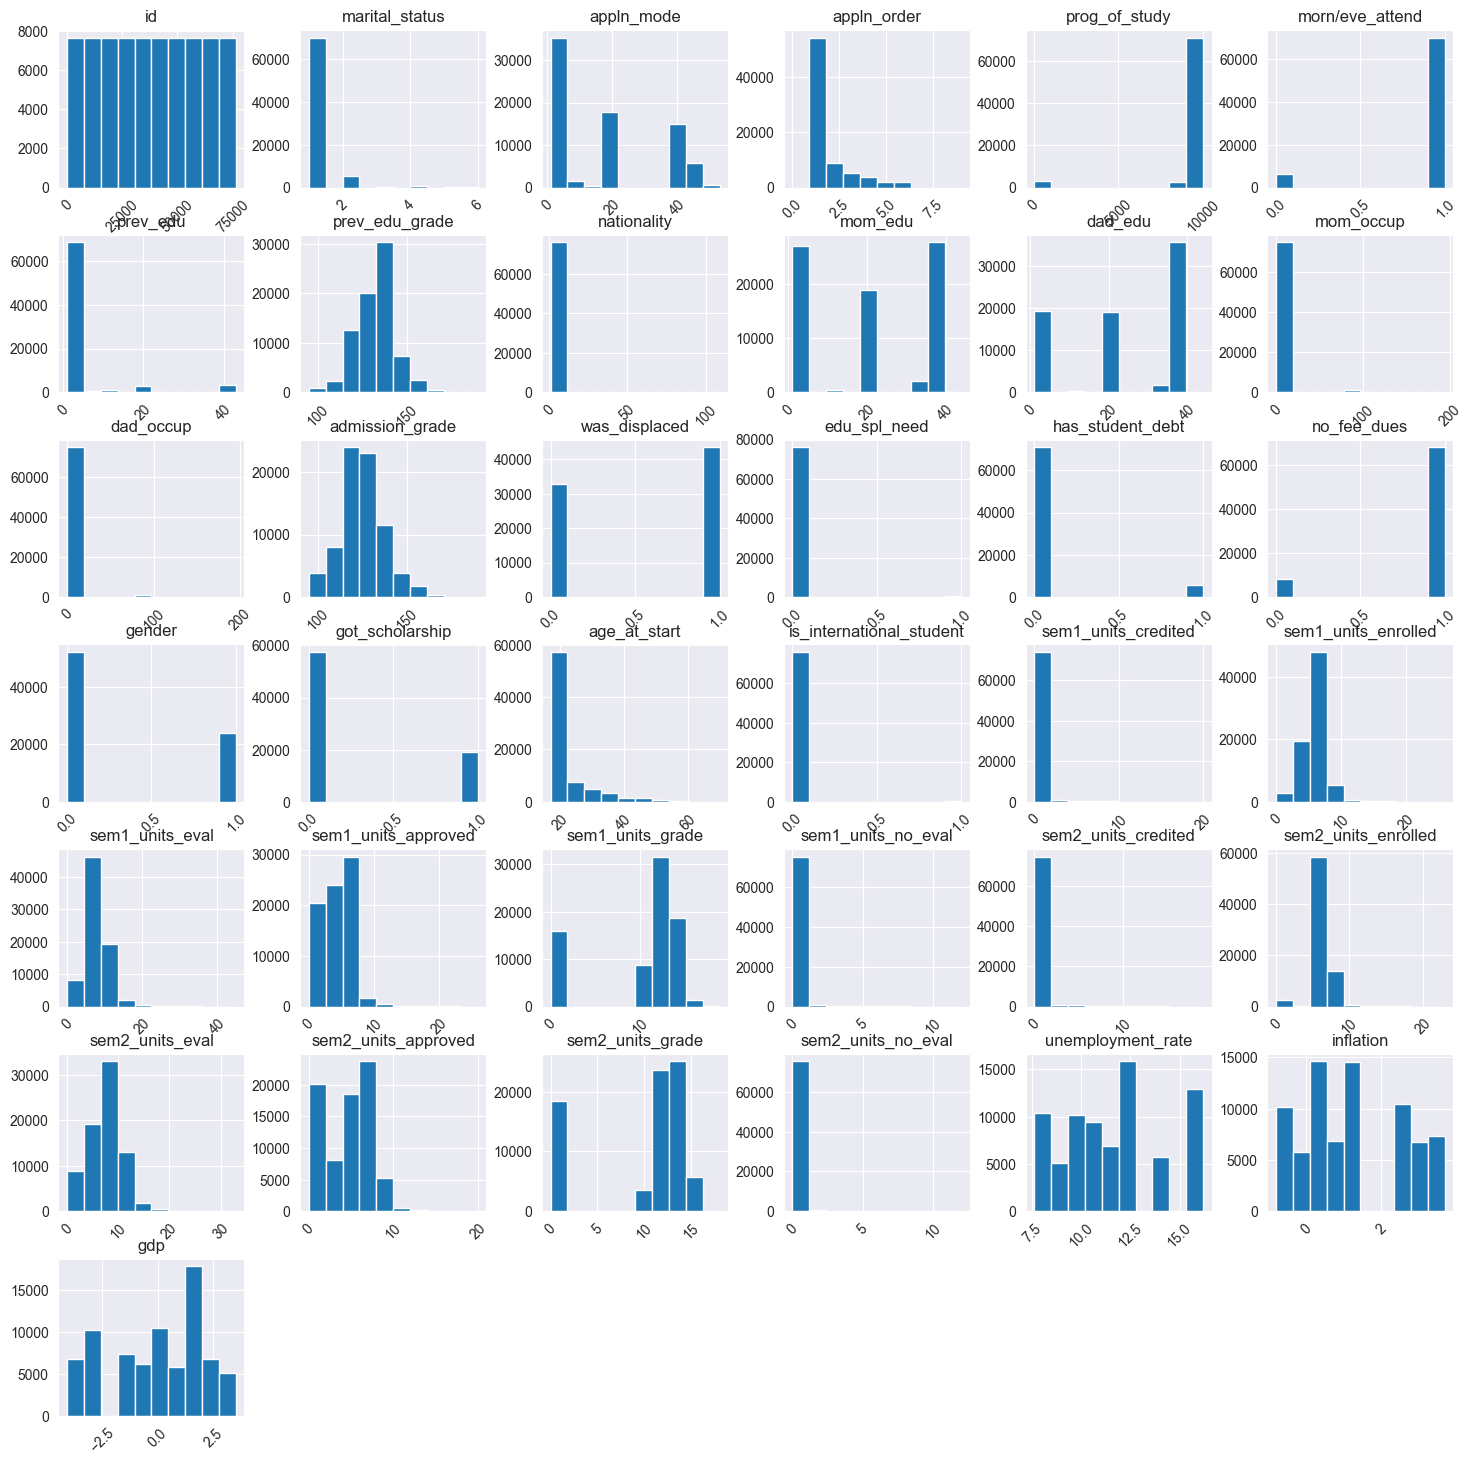

In [7]:
train_df.hist(figsize=(18,18), xrot=45)

Let's see how the target classes are distributed

<Axes: >

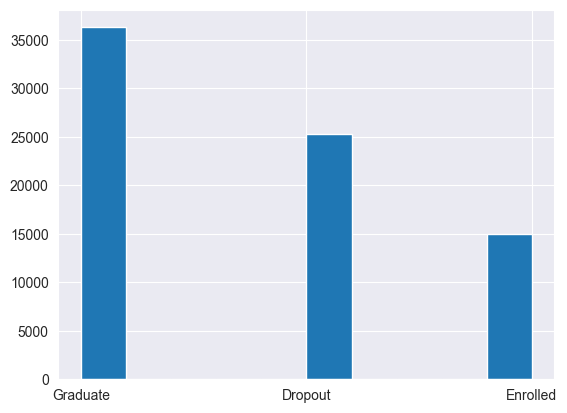

In [8]:
train_df['Target'].hist()

Let's see which factors affect the classes

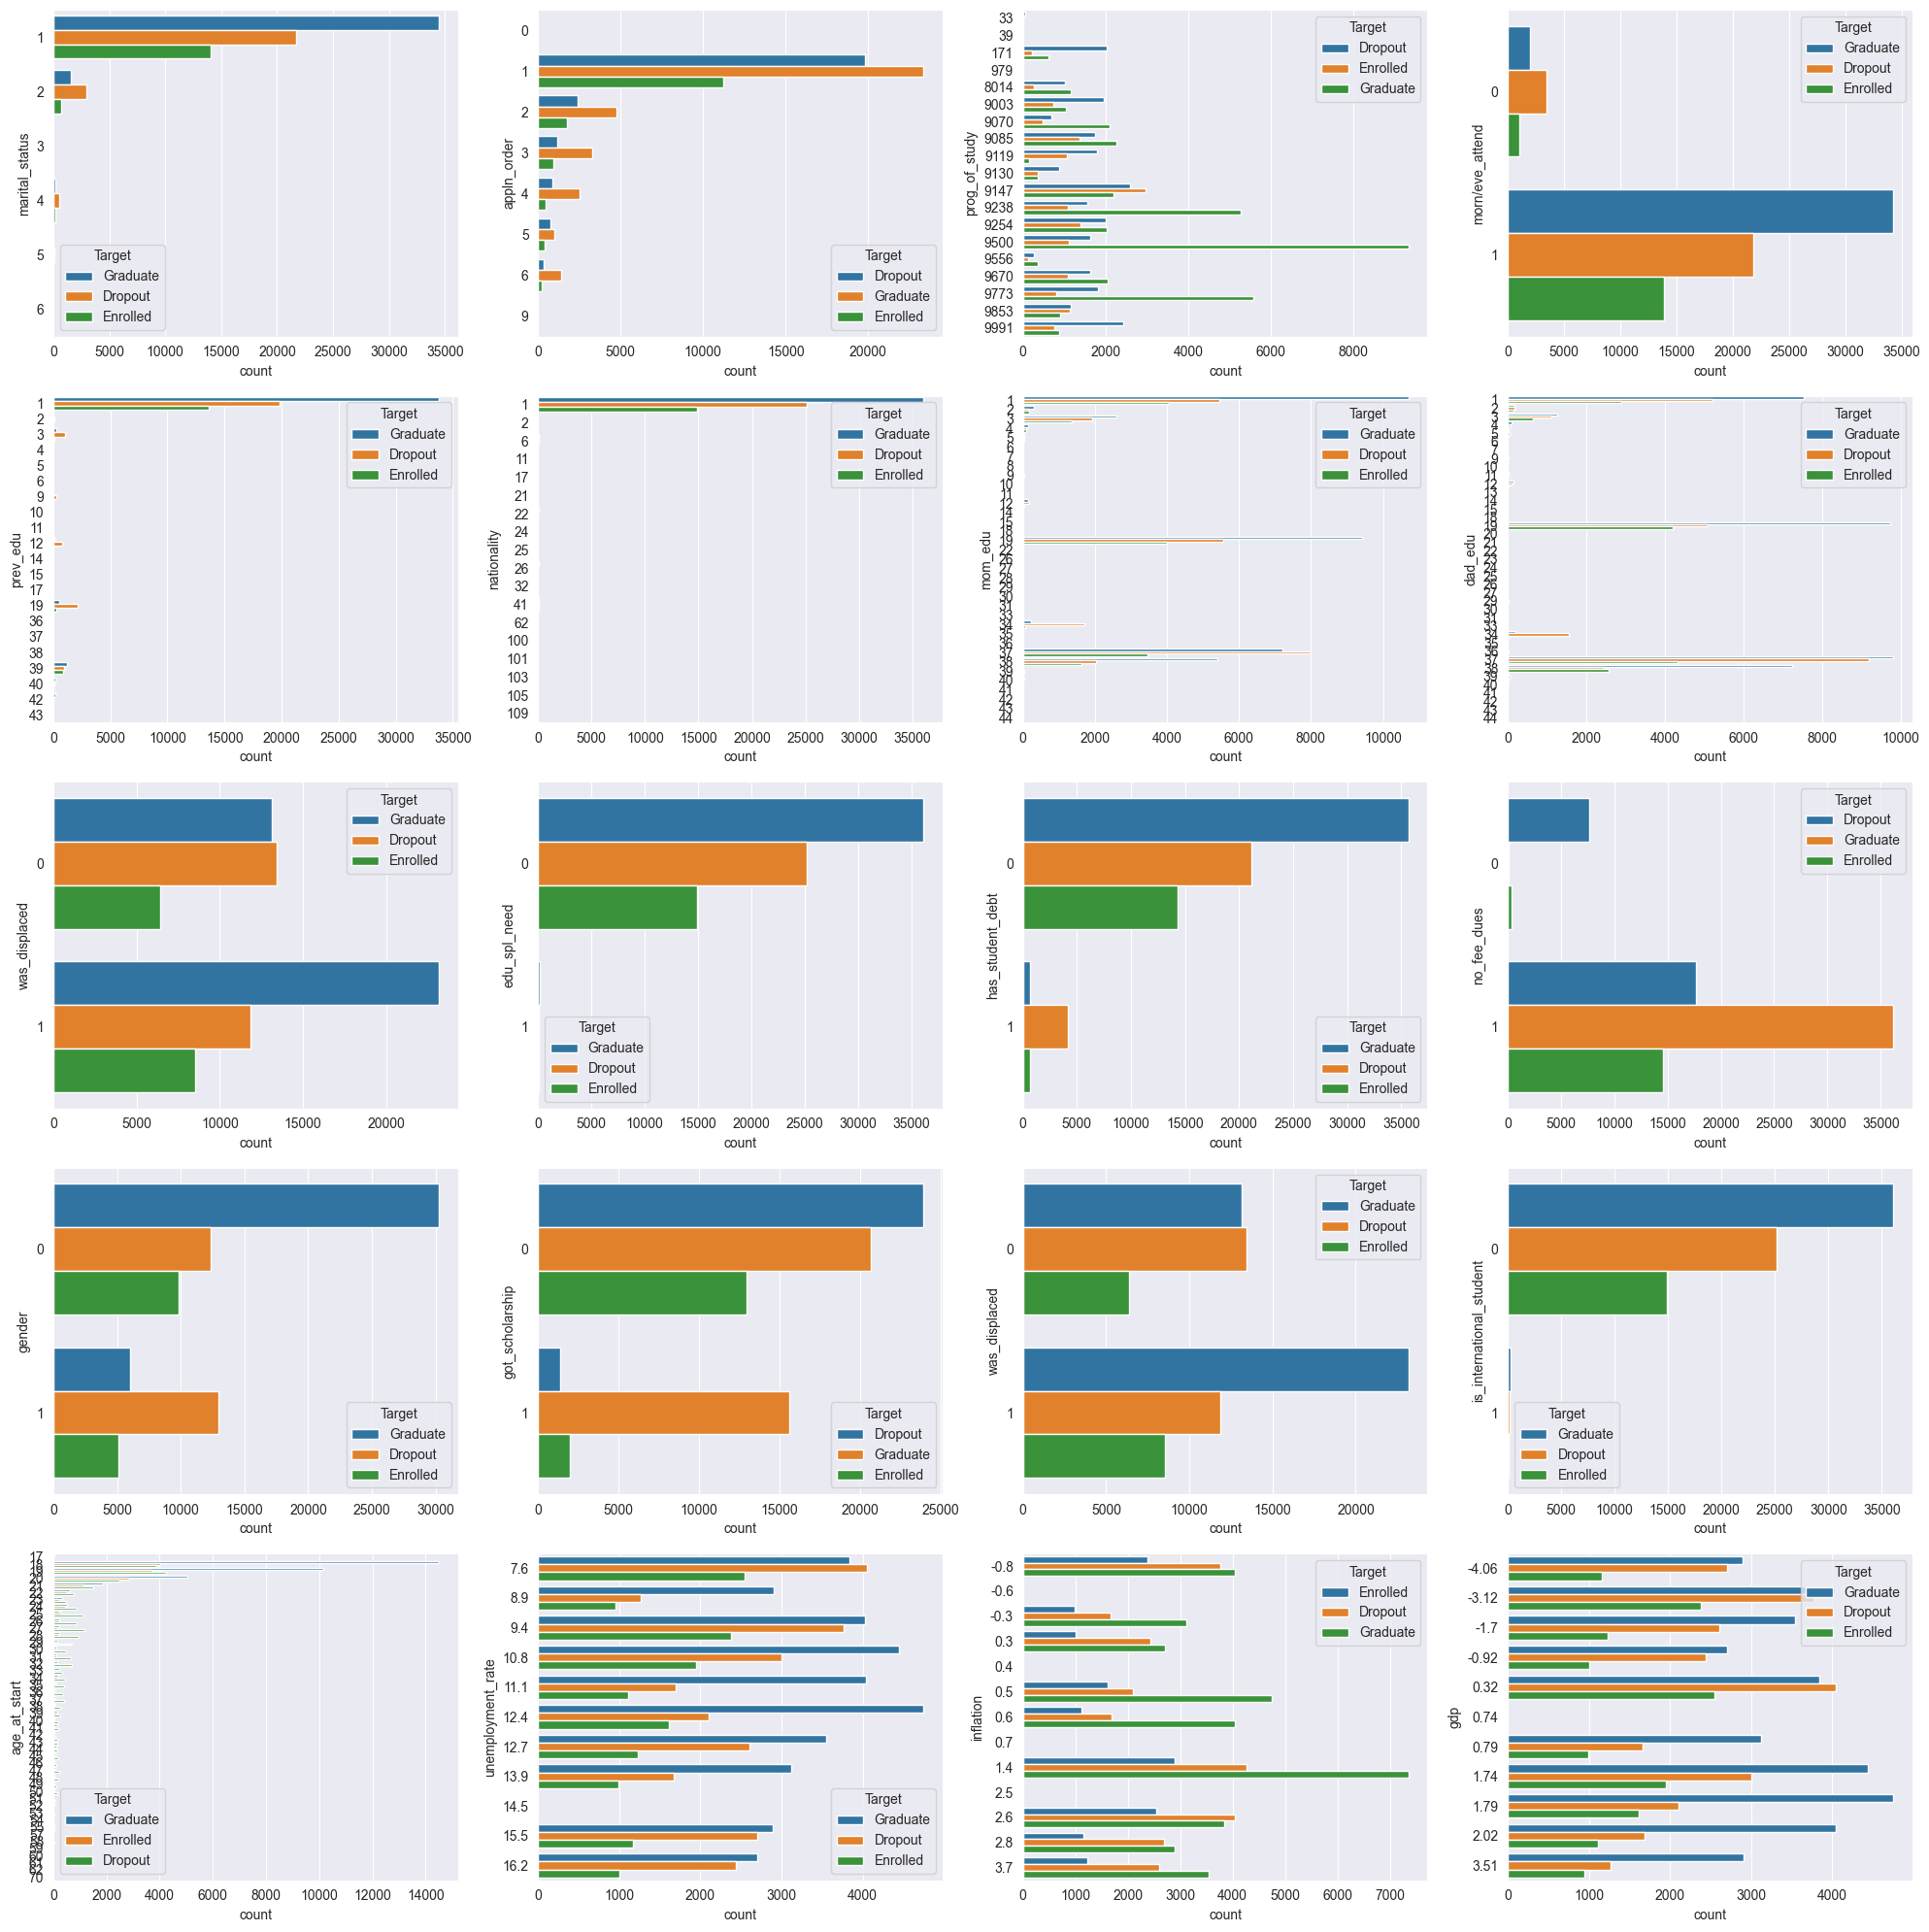

In [9]:
# cols = list(train_df.columns)[1:-1]
cols = ['marital_status','appln_order','prog_of_study','morn/eve_attend','prev_edu',
        'nationality','mom_edu','dad_edu','was_displaced','edu_spl_need',
        'has_student_debt','no_fee_dues','gender','got_scholarship','was_displaced',
        'is_international_student','age_at_start','unemployment_rate','inflation','gdp'
        ]

r, c = 5, 4
fig, axes = plt.subplots(r, c, figsize=(20, 20))  # Adjust figsize as needed

# Flatten the axes array to make iteration easier
axes = axes.flatten()

for i in range(r * c):
    if i < len(cols):
        ax = axes[i]
        sns.countplot(data=train_df, y=cols[i], hue="Target", ax=ax)
    else:
        fig.delaxes(axes[i])  # Remove unused axes

plt.tight_layout()
plt.show()